# EDA Project on Laptop Prices - Rohit Gadekar

In [2]:
#ignore non harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

## Data Ingestion

In [6]:
import pandas as pd

In [7]:
path = r"C:\Users\Dell\Pictures\DS Document\Basic python\laptopPrice.csv"

In [9]:
df = pd.read_csv(path)
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


## data quality checks

In [10]:
df.shape

(823, 19)

In [11]:
df.duplicated().sum()

np.int64(21)

In [12]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(802, 19)

In [13]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 1

## Descriptive statics

In [17]:
cat_cols = df.columns[df.dtypes == 'object']
cat_cols

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating'],
      dtype='object')

In [23]:
con_cols = df.columns[df.dtypes != "object"]
con_cols

Index(['Price', 'Number of Ratings', 'Number of Reviews'], dtype='object')

In [24]:
df[cat_cols].describe().T

,count,unique,top,freq
brand,802,8,ASUS,243
processor_brand,802,3,Intel,594
processor_name,802,11,Core i5,284
processor_gnrtn,802,8,11th,328
ram_gb,802,4,8 GB,404
ram_type,802,6,DDR4,690
ssd,802,7,512 GB,389
hdd,802,4,0 GB,602
os,802,3,Windows,763
os_bit,802,2,64-bit,693


In [26]:
df[con_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Price,802.0,76625.54,45232.98,16990.0,45990.0,63990.0,89525.00,441990.0
Number of Ratings,802.0,299.84,1001.78,0.0,0.0,17.0,140.25,15279.0
Number of Reviews,802.0,36.09,118.31,0.0,0.0,2.0,18.00,1947.0


## Data Visualization

In [31]:
# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Univariate Analysis

### Countplot

In [32]:
cat_cols

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating'],
      dtype='object')

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64


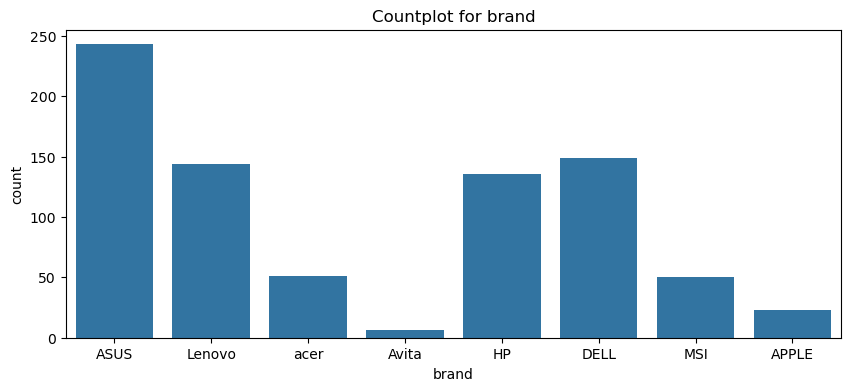

processor_brand
Intel    594
AMD      189
M1        19
Name: count, dtype: int64


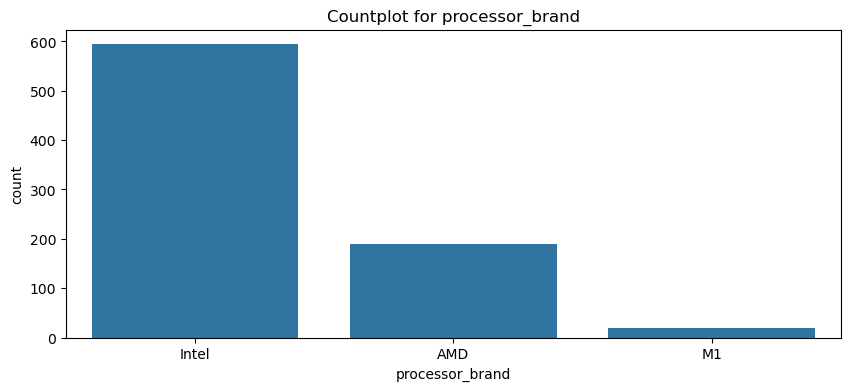

processor_name
Core i5         284
Core i3         161
Core i7         104
Ryzen 5          82
Ryzen 7          56
Ryzen 9          26
Ryzen 3          26
Celeron Dual     23
M1               19
Pentium Quad     13
Core i9           8
Name: count, dtype: int64


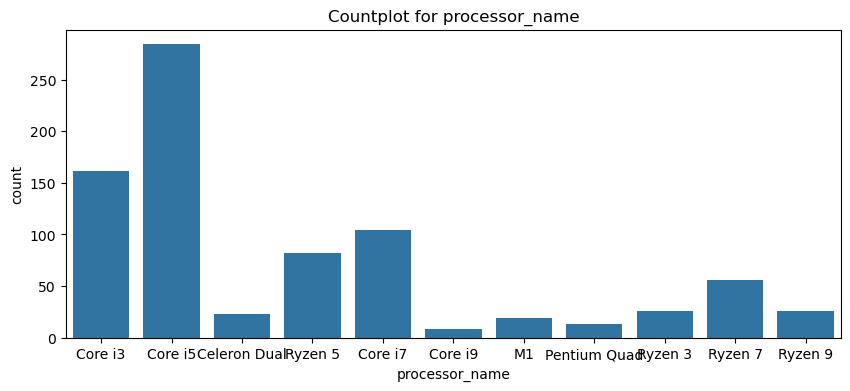

processor_gnrtn
11th             328
Not Available    224
10th             198
8th               35
7th                7
9th                6
12th               3
4th                1
Name: count, dtype: int64


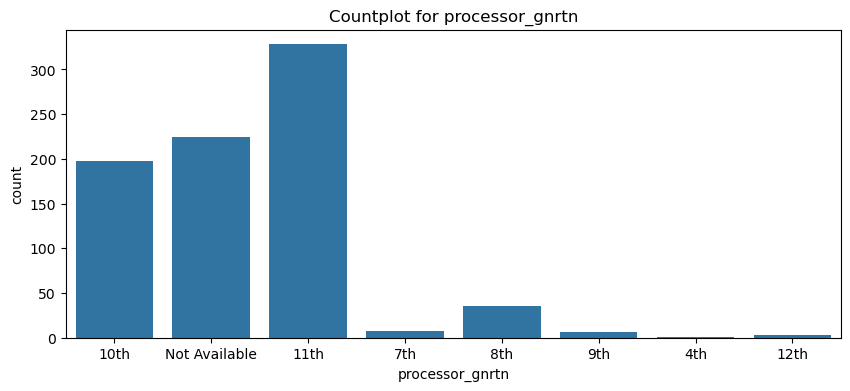

ram_gb
8 GB     404
4 GB     223
16 GB    173
32 GB      2
Name: count, dtype: int64


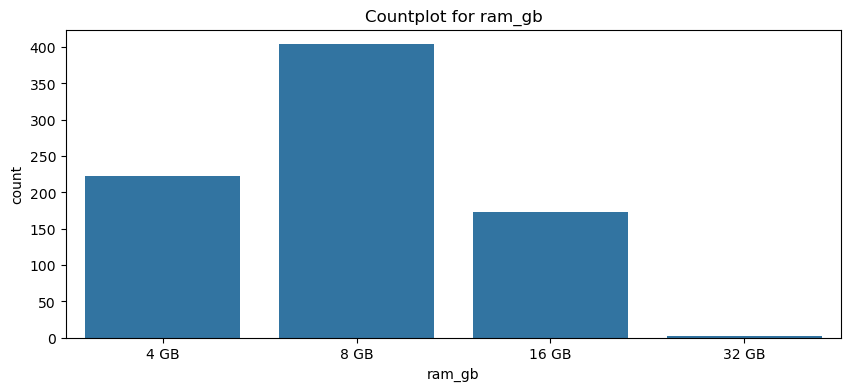

ram_type
DDR4       690
LPDDR4X     56
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64


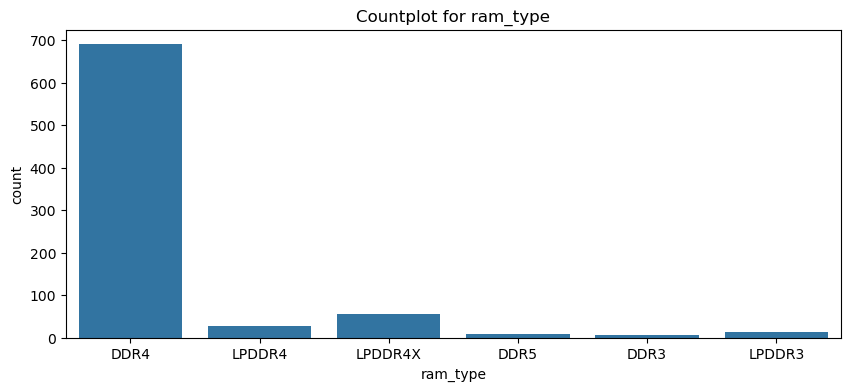

ssd
512 GB     389
256 GB     174
0 GB       123
1024 GB    110
128 GB       3
2048 GB      2
3072 GB      1
Name: count, dtype: int64


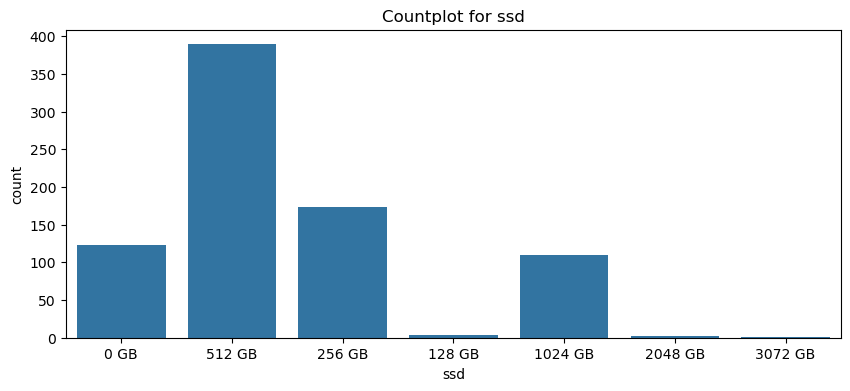

hdd
0 GB       602
1024 GB    159
512 GB      40
2048 GB      1
Name: count, dtype: int64


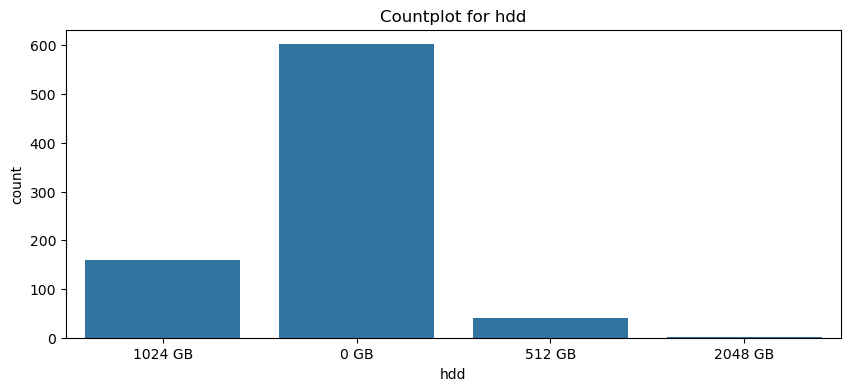

os
Windows    763
Mac         23
DOS         16
Name: count, dtype: int64


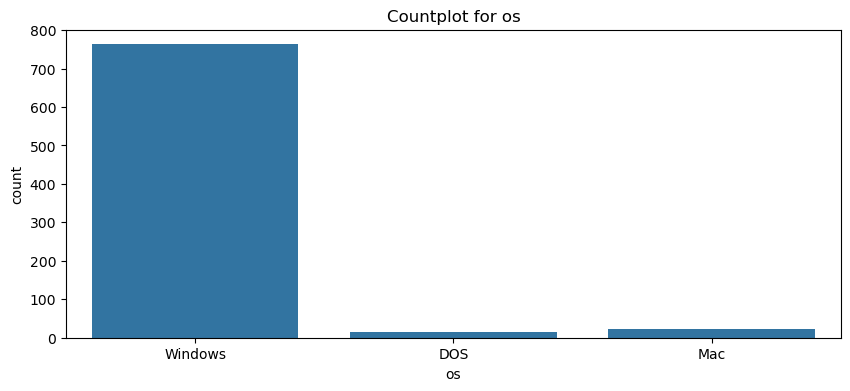

os_bit
64-bit    693
32-bit    109
Name: count, dtype: int64


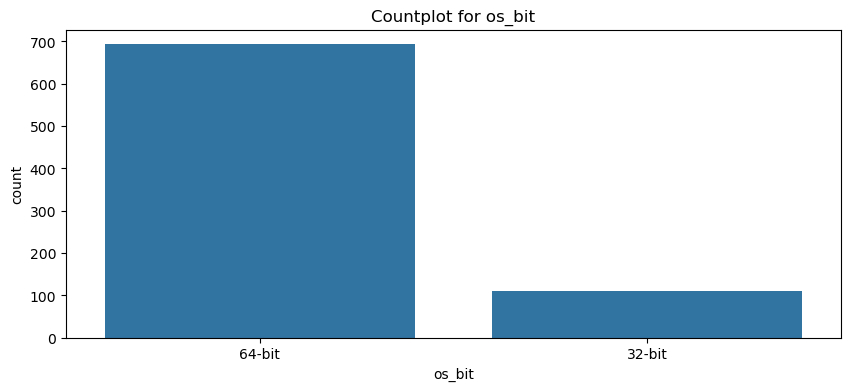

graphic_card_gb
0 GB    557
4 GB    127
2 GB     67
6 GB     37
8 GB     14
Name: count, dtype: int64


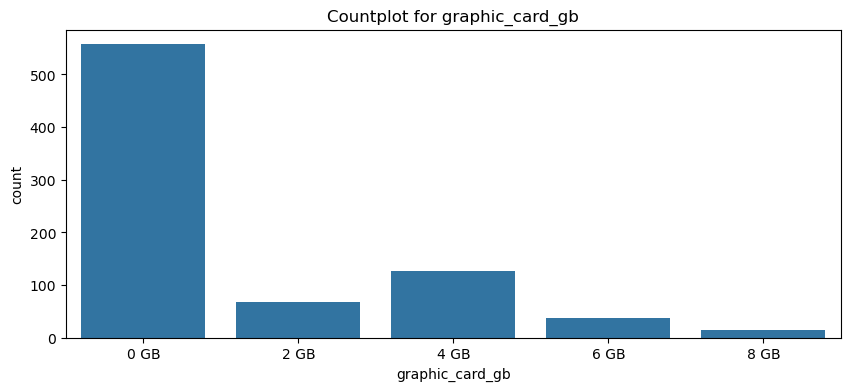

weight
Casual        509
ThinNlight    254
Gaming         39
Name: count, dtype: int64


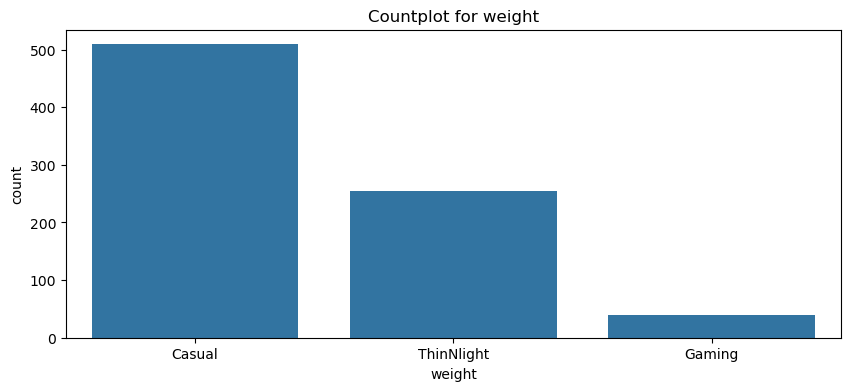

warranty
1 year         498
No warranty    268
2 years         23
3 years         13
Name: count, dtype: int64


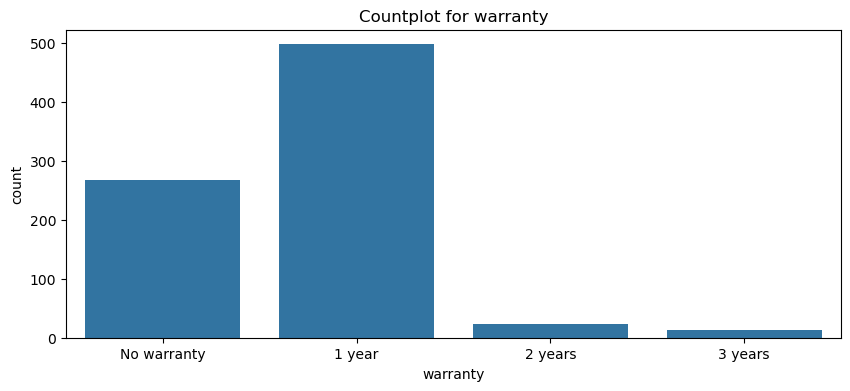

Touchscreen
No     706
Yes     96
Name: count, dtype: int64


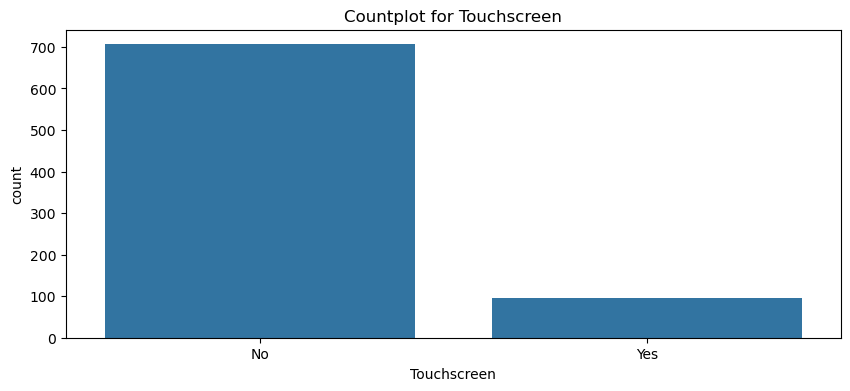

msoffice
No     522
Yes    280
Name: count, dtype: int64


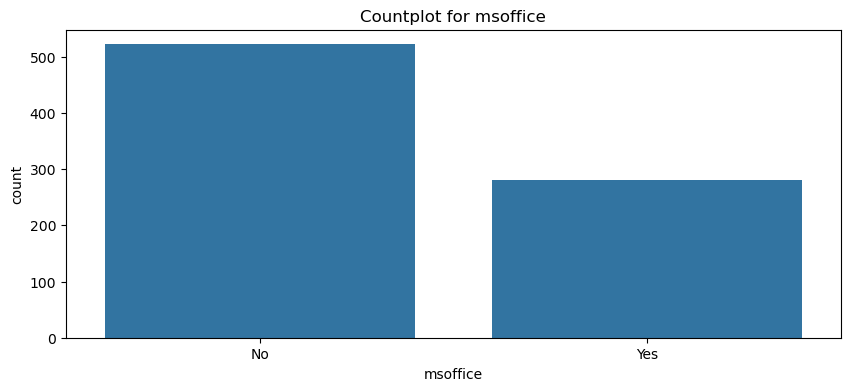

rating
4 stars    437
3 stars    338
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64


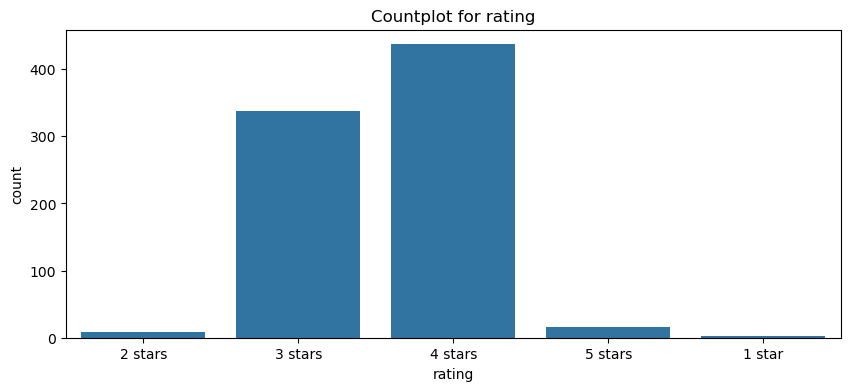

In [33]:
for col in cat_cols:
    print(df[col].value_counts())
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot for {col}")
    plt.show()

### Histplot

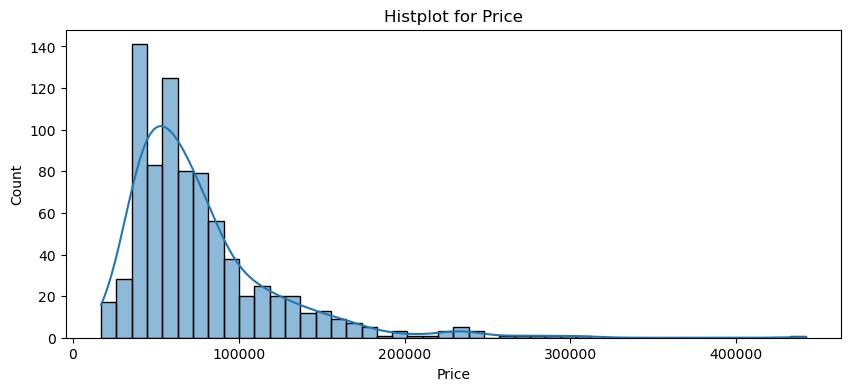

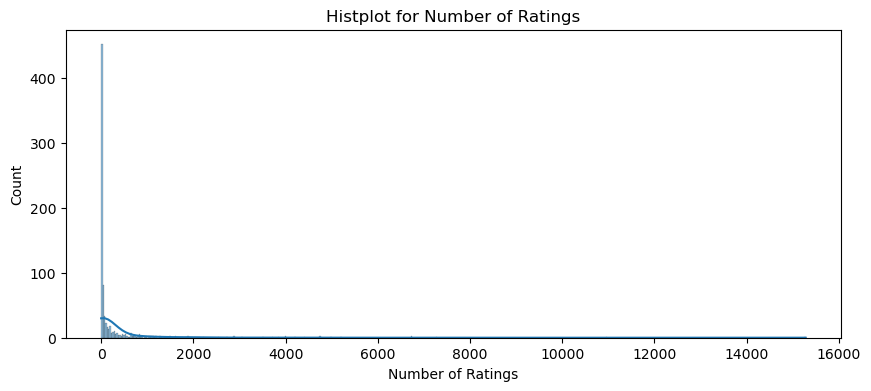

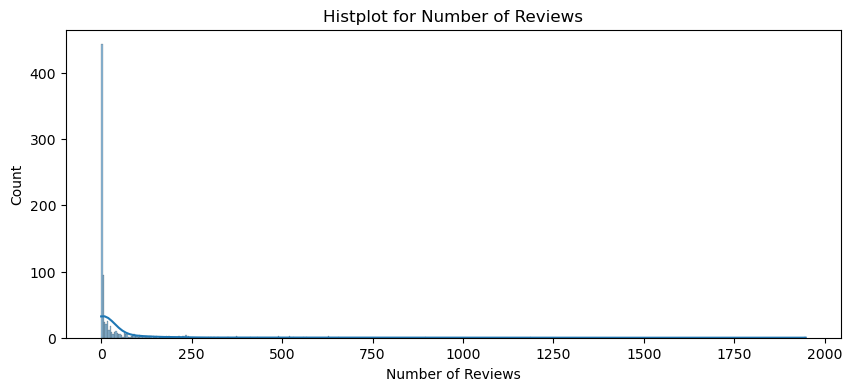

In [35]:
for col in con_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Histplot for {col}")
    plt.show()

<Axes: xlabel='Price', ylabel='Density'>

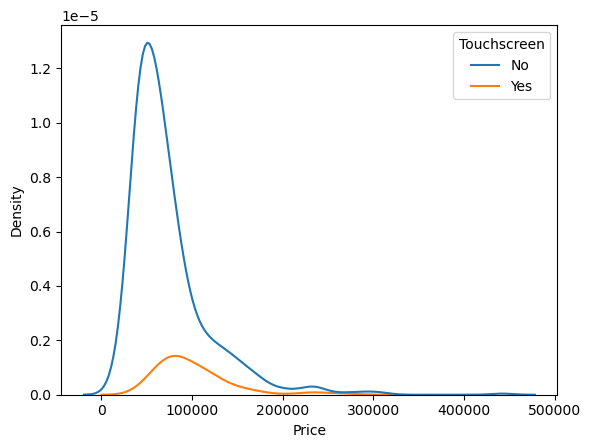

In [36]:
sns.kdeplot(data=df, x="Price", hue= "Touchscreen")

<Axes: xlabel='Price', ylabel='Density'>

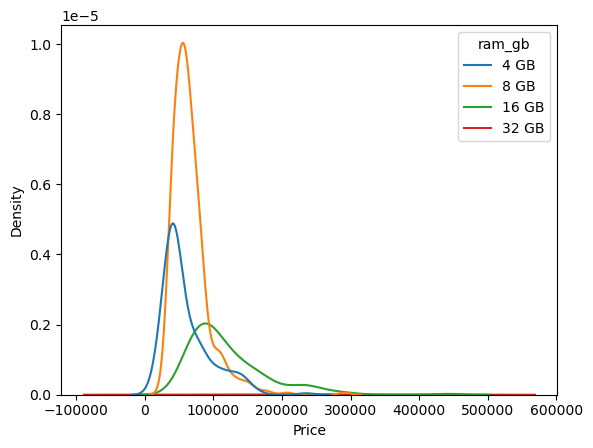

In [37]:
sns.kdeplot(data=df, x="Price", hue = "ram_gb")

## 2. Bivariate Analysis

### Scatterplot or regplot

In [38]:
con_cols

Index(['Price', 'Number of Ratings', 'Number of Reviews'], dtype='object')

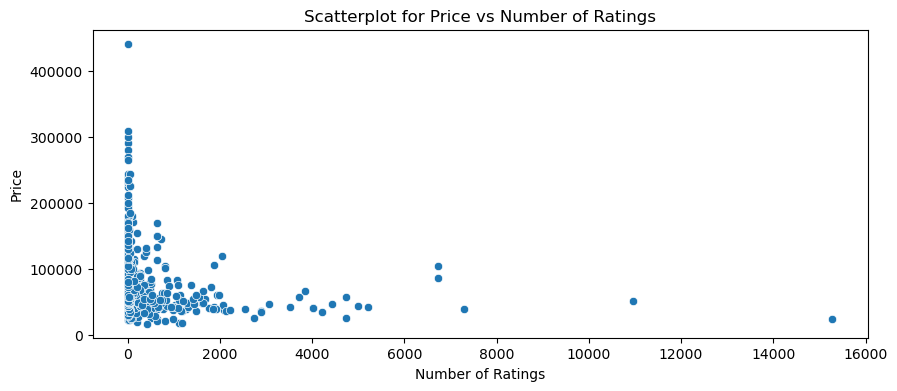

In [40]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x="Number of Ratings", y="Price")
plt.title("Scatterplot for Price vs Number of Ratings")
plt.show()

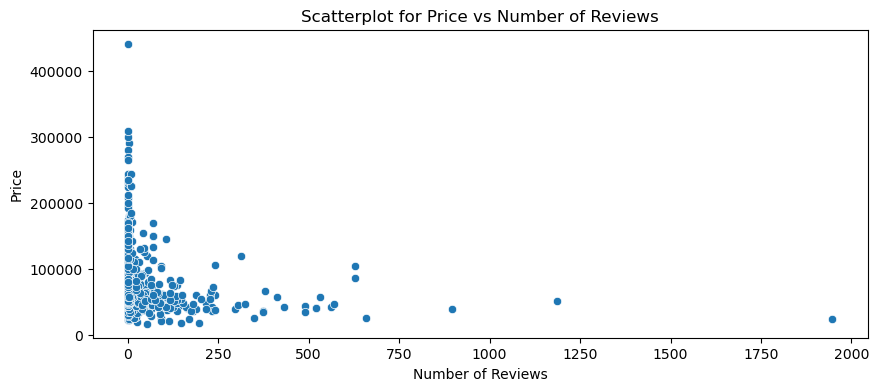

In [41]:
plt.figure(figsize = (10,4))
sns.scatterplot(data=df, x ="Number of Reviews", y= "Price")
plt.title("Scatterplot for Price vs Number of Reviews")
plt.show()

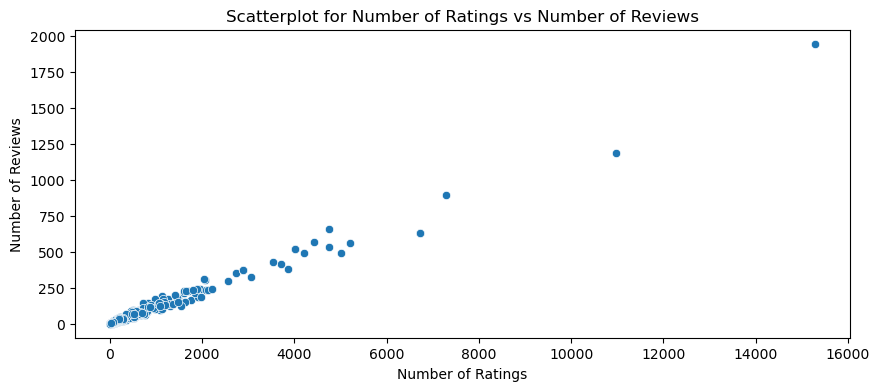

In [42]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x="Number of Ratings", y="Number of Reviews")
plt.title("Scatterplot for Number of Ratings vs Number of Reviews")
plt.show()

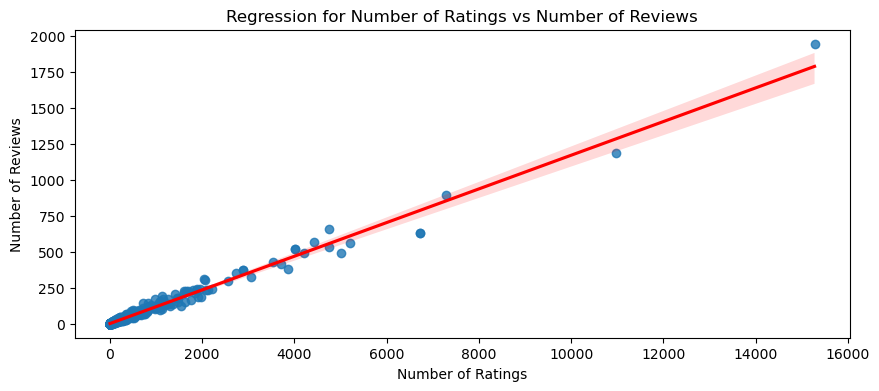

In [43]:
plt.figure(figsize=(10,4))
sns.regplot(data=df, x="Number of Ratings", y="Number of Reviews", line_kws= {"color" : "red"})
plt.title("Regression for Number of Ratings vs Number of Reviews")
plt.show()


### Boxplot

In [44]:
cat_cols

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating'],
      dtype='object')

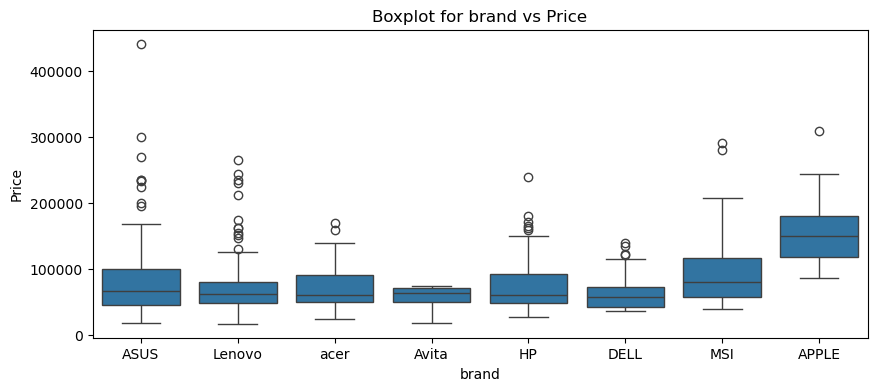

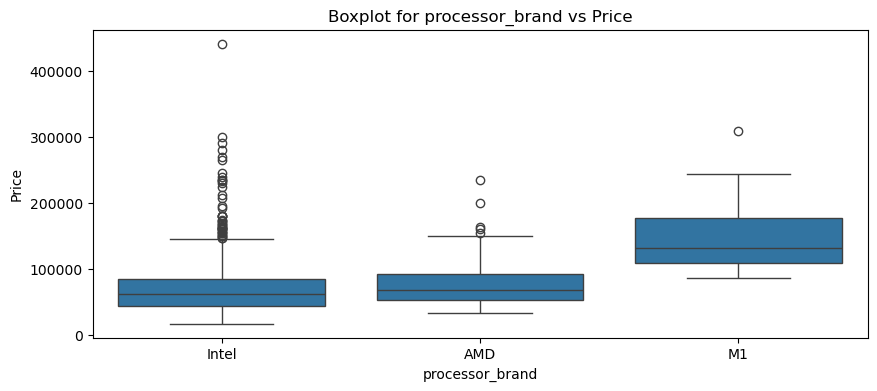

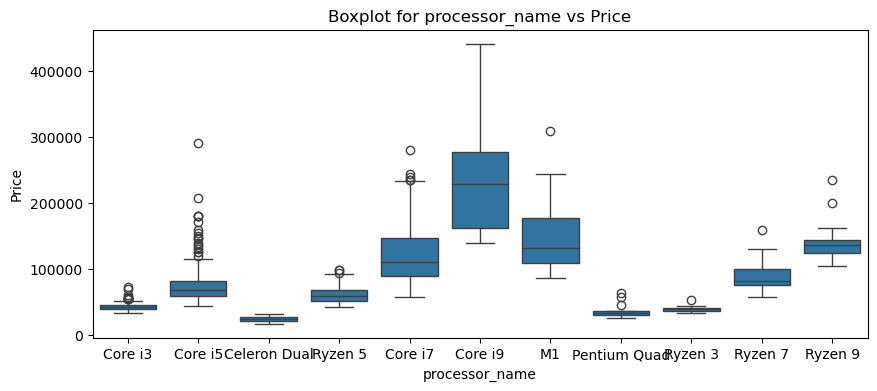

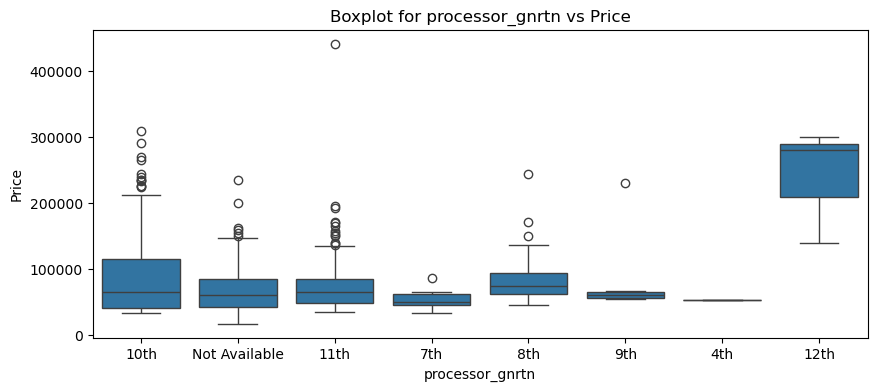

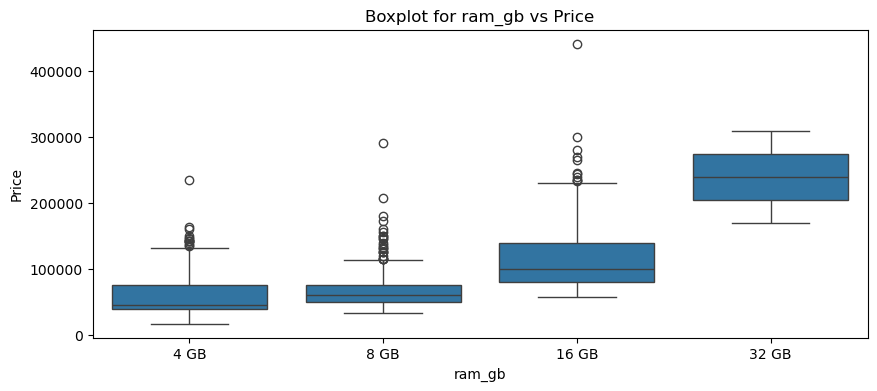

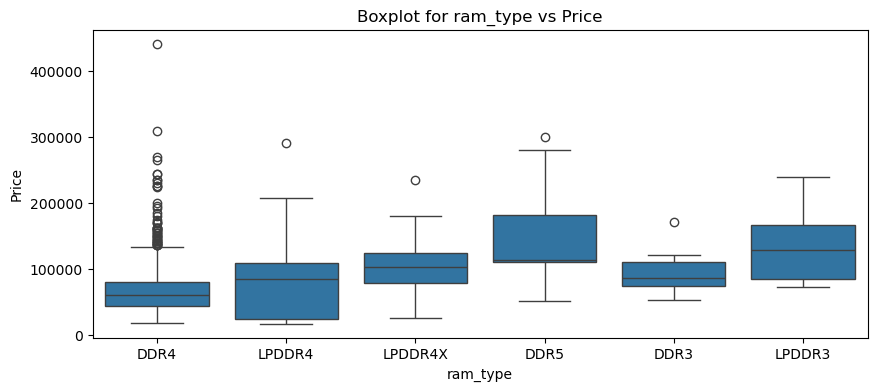

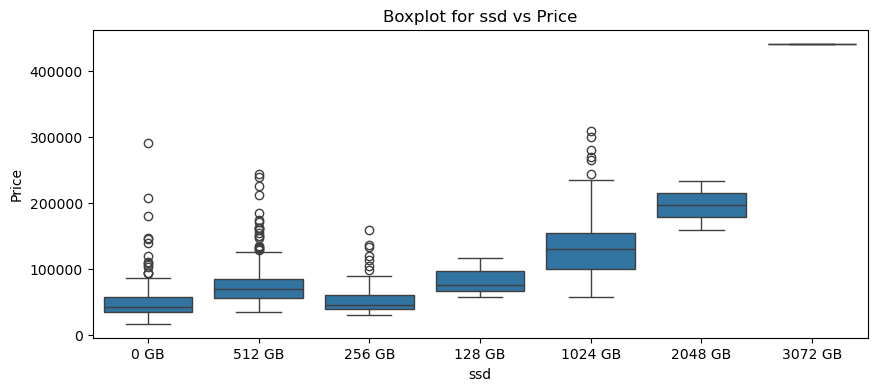

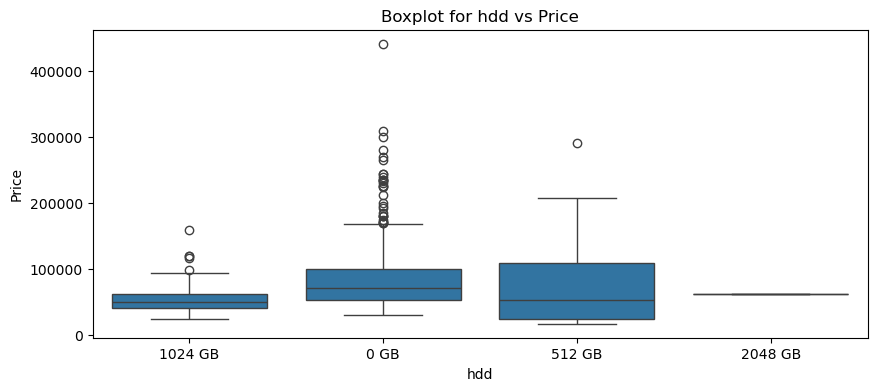

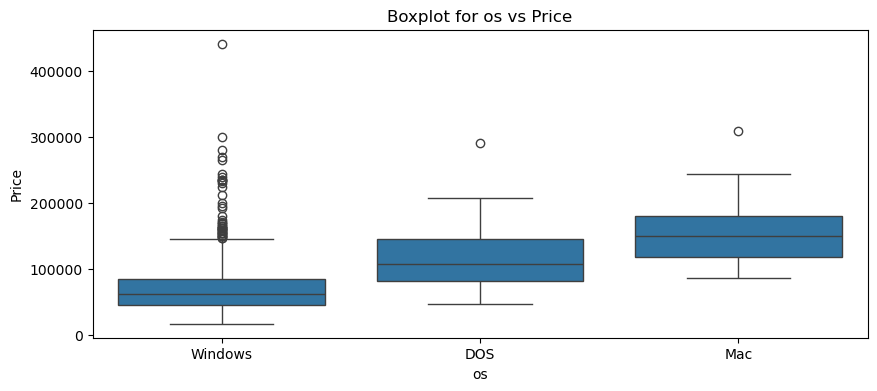

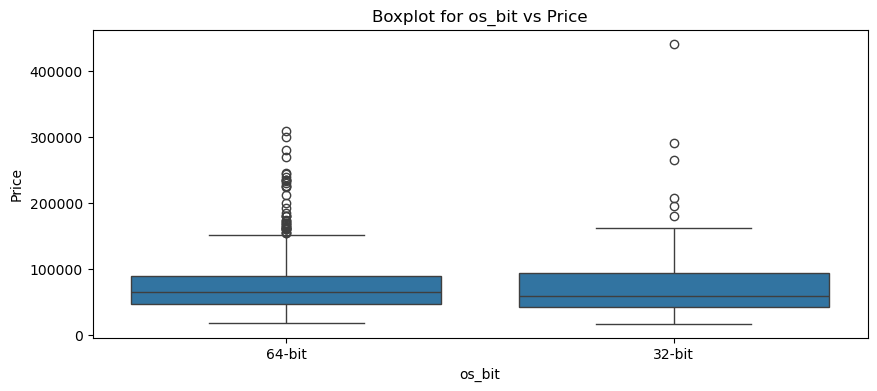

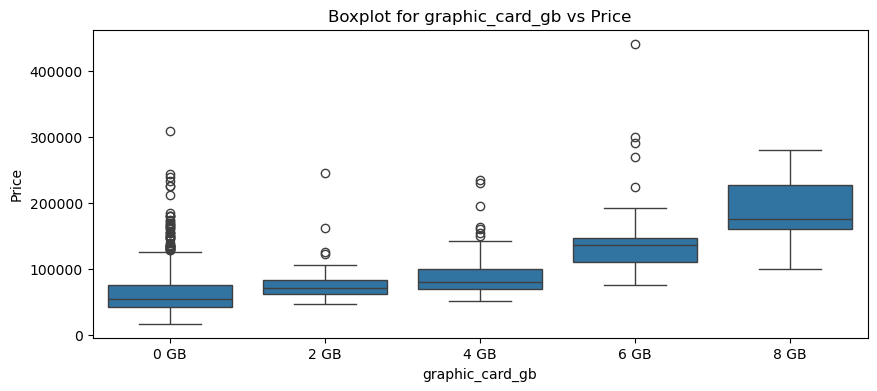

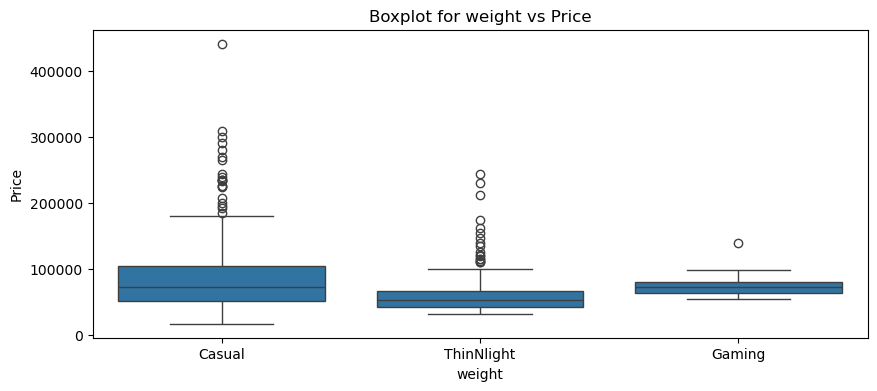

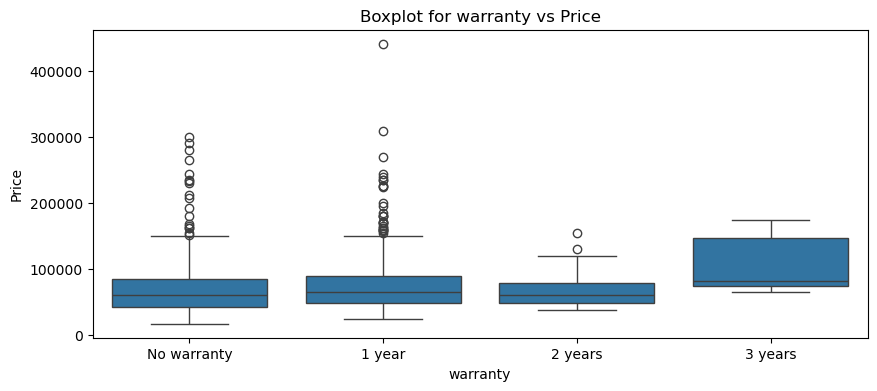

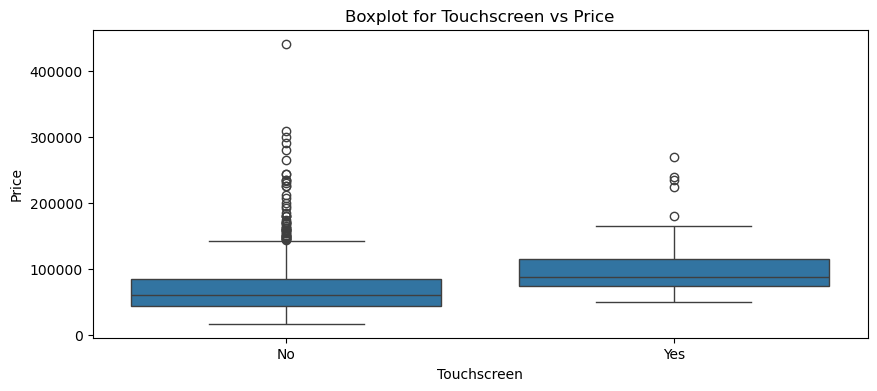

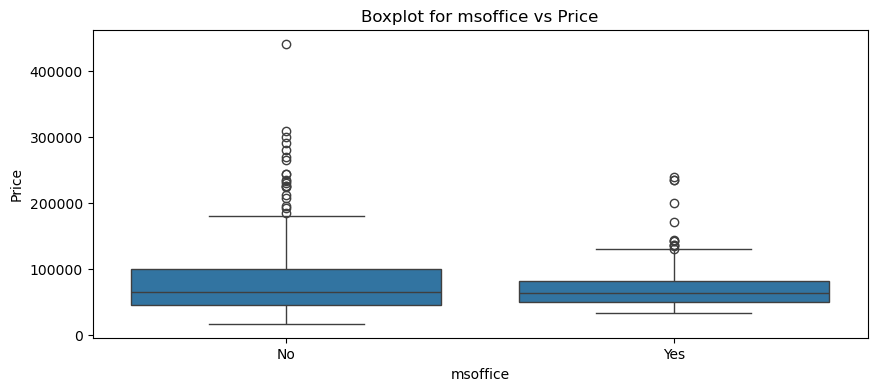

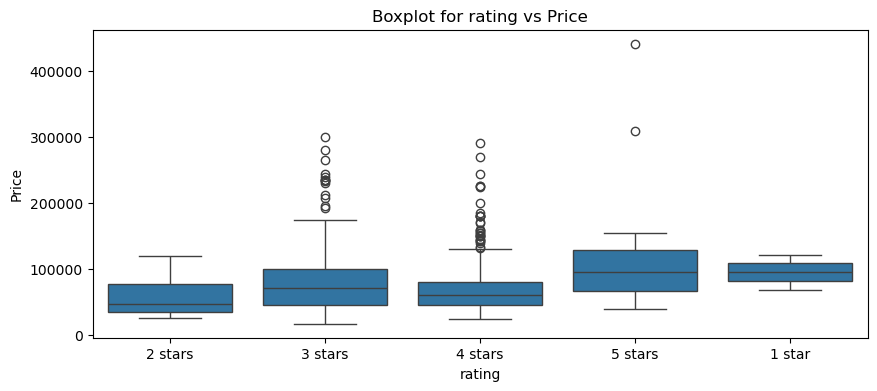

In [46]:
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df, x=col, y="Price")
    plt.title(f"Boxplot for {col} vs Price")
    plt.show()

### Countplot Heatmap

In [48]:
cat_cols

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating'],
      dtype='object')

In [49]:
ctab1 = pd.crosstab(df["brand"], df["ram_gb"])
ctab1

ram_gb,16 GB,32 GB,4 GB,8 GB
brand,,,,
APPLE,11,1,1,10
ASUS,58,0,87,98
Avita,1,0,1,4
DELL,15,0,38,96
HP,35,0,38,63
Lenovo,26,0,40,78
MSI,18,0,5,27
acer,9,1,13,28


<Axes: xlabel='ram_gb', ylabel='brand'>

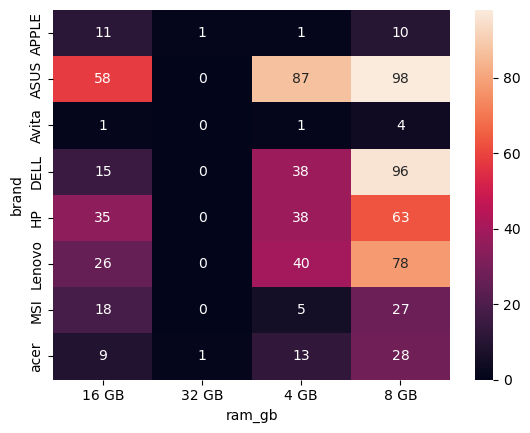

In [52]:
sns.heatmap(data=ctab1, annot=True, fmt="d")

In [53]:
ctab2 = pd.crosstab(df["processor_brand"], df["warranty"])
ctab2

warranty,1 year,2 years,3 years,No warranty
processor_brand,,,,
AMD,132,0,3,54
Intel,347,23,10,214
M1,19,0,0,0


<Axes: xlabel='warranty', ylabel='processor_brand'>

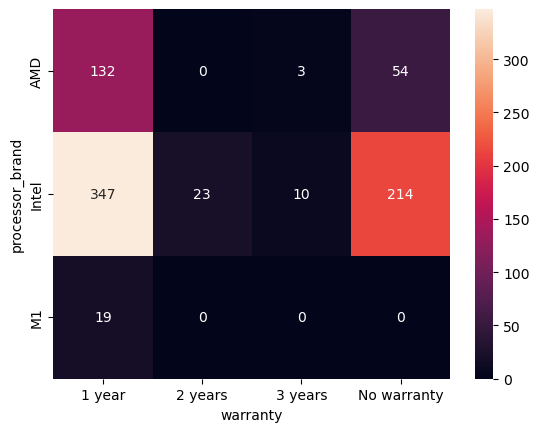

In [54]:
sns.heatmap(data=ctab2, annot=True, fmt="d")

## 3. Multivariate Analysis

### Correlation heatmap

In [55]:
corr = df.corr(numeric_only=True)
corr

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.152553,-0.156791
Number of Ratings,-0.152553,1.000000,0.991062
Number of Reviews,-0.156791,0.991062,1.000000


<Axes: >

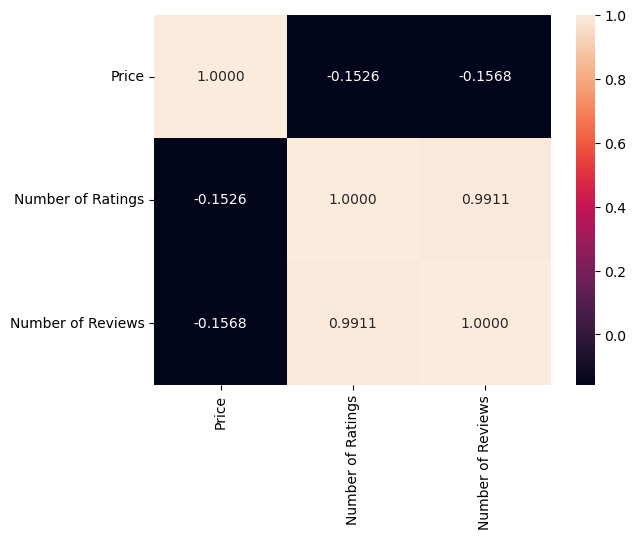

In [56]:
sns.heatmap(data=corr, annot=True, fmt=".4f")

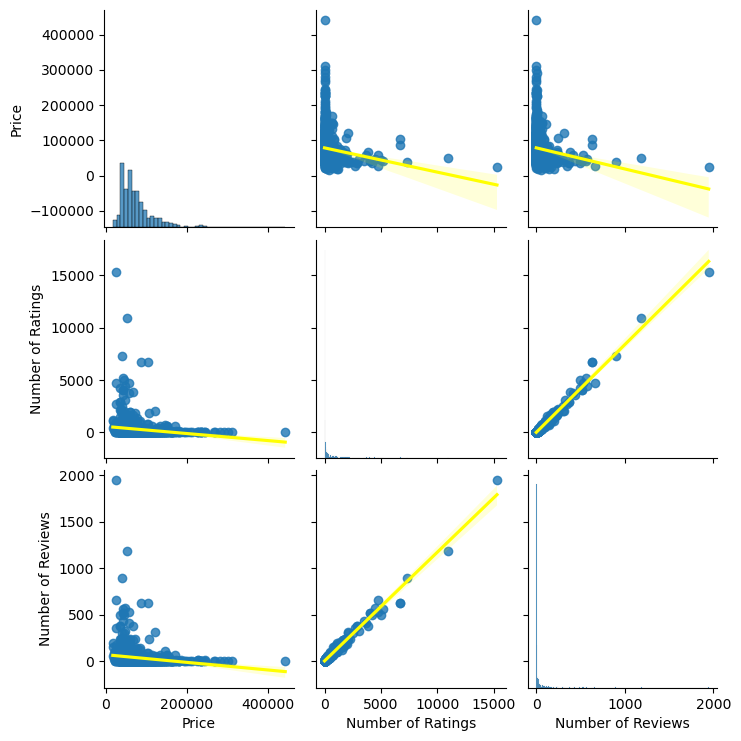

In [60]:
sns.pairplot(data=df, kind="reg", plot_kws={"line_kws" : {"color" : "yellow"}})

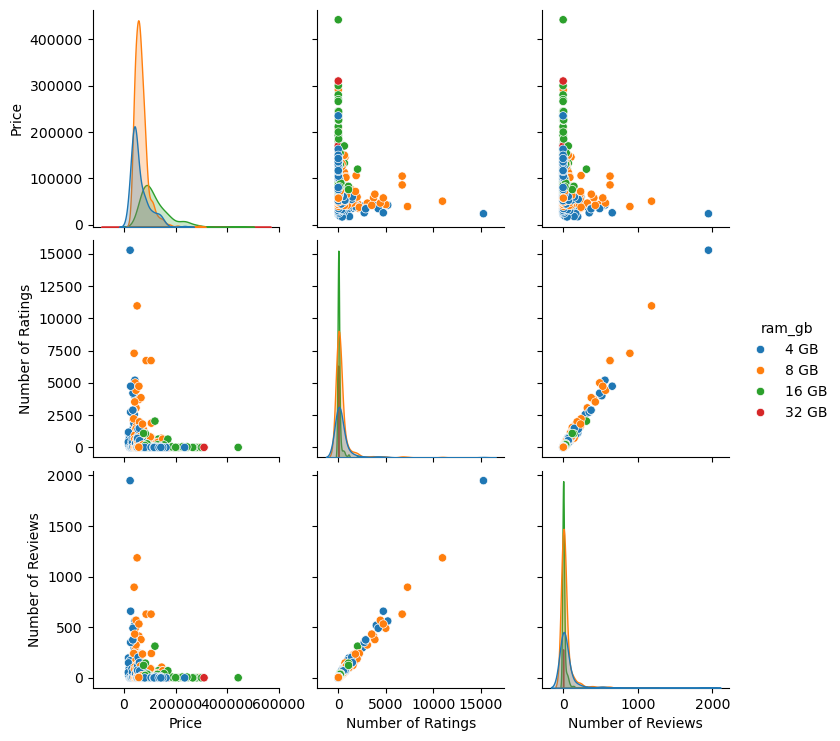

In [62]:
sns.pairplot(data= df, hue="ram_gb")

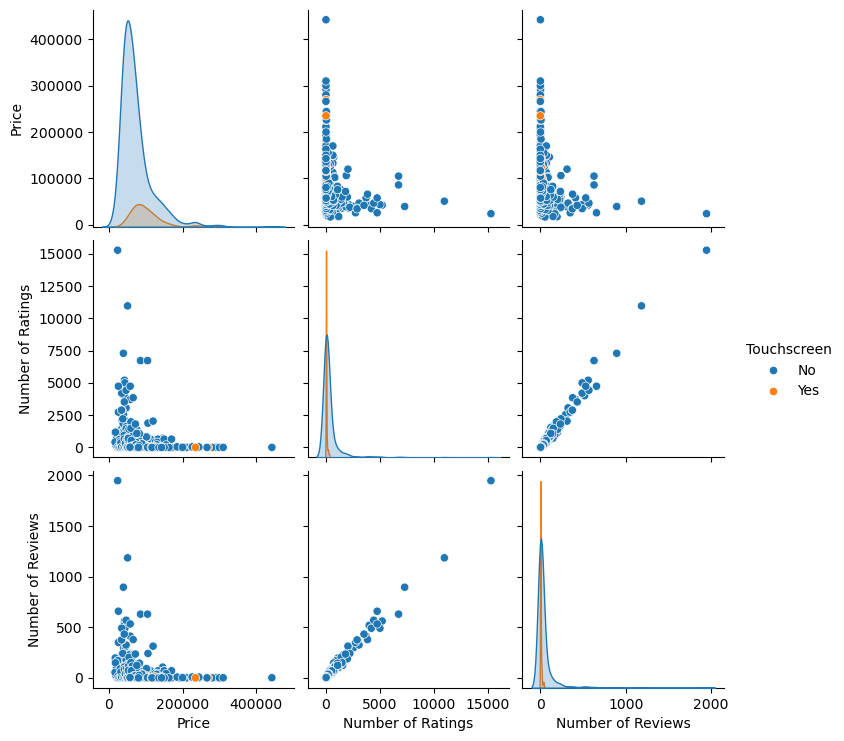

In [63]:
sns.pairplot(data=df, hue="Touchscreen")

## EDA Completed